In [2]:
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from src.visualization.visualize import reduce_xaxis_labels

%matplotlib inline
# Use our own style file for the plots
plt.style.use('ggplot')


# setting the project dir 
project_dir = Path(os.getcwd()).resolve().parents[0]


In [3]:
labels= pd.read_csv(project_dir / "data/raw/labels.csv")
expression_data = pd.read_csv(project_dir / "data/raw/data.csv")

# Importing data

## 1- expression dataset

In [4]:
expression_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [5]:
expression_data.shape

(801, 20532)

##  2- Labels

In [6]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [7]:
labels.shape

(801, 2)

In [8]:
labels.describe()

,Unnamed: 0,Class
count,801,801
unique,801,5
top,sample_0,BRCA
freq,1,300


# Checking data distributions 
Verify whether or not we need to normalize our dataset 

[Text(0.5, 1.0, 'Labels distribution')]

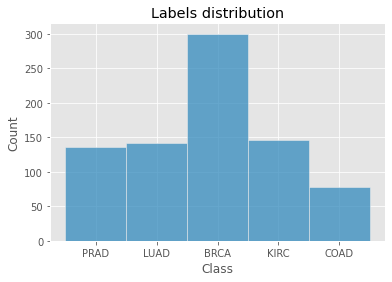

In [9]:
sns.histplot(data=labels, x="Class").set(title='Labels distribution')

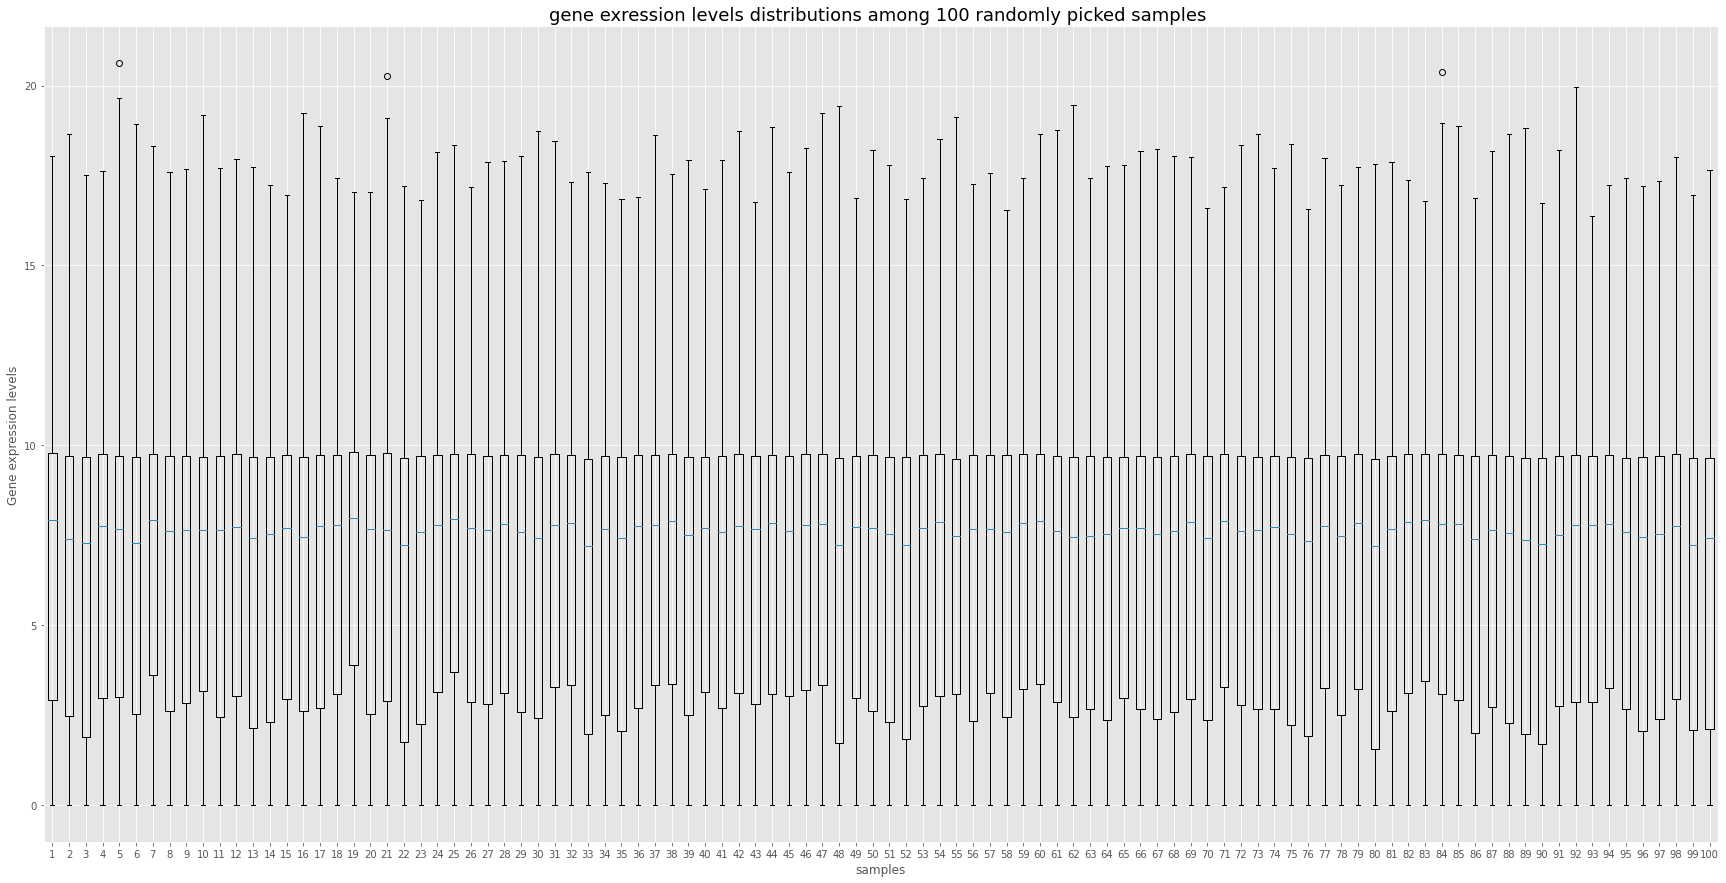

In [10]:
# Subset data for plotting
expression_levels = np.asarray(expression_data.iloc[:,1:], dtype=float)
np.random.seed(seed=7) # Set seed so we will get consistent results
# Randomly select 70 samples
samples_index = np.random.choice(range(expression_data.shape[0]), size=100, replace=False)
expression_levels_subset = expression_levels[samples_index,:]


# Bar plot of expression counts by individual
fig, ax = plt.subplots(figsize=(30, 15))
with plt.style.context("ggplot"):
    ax.boxplot(expression_levels_subset.transpose())
    ax.set_xlabel("samples")
    ax.set_ylabel("Gene expression levels")
    ax.set_title("gene exression levels distributions among 100 randomly picked samples " ,fontsize=18)
    #reduce_xaxis_labels(ax, 5)

# Transform dataset (Merge, rename columns ,save results)

we can conclude that the data is all ready normalized because the gene expression levels are a common scale and range for different samples  

Here we will just rename the sample name , so it makes more sens and save these files in data/transformed 

In [11]:
expression_data.rename({"Unnamed: 0":"sample"}, axis='columns', inplace =True) 
labels.rename({"Unnamed: 0":"sample"}, axis='columns', inplace =True)

labled_expression_dataset = pd.merge(labels,expression_data,on="sample")
labled_expression_dataset

,sample,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [69]:
expression_data.to_csv(project_dir/ "data/transformed/expression_data.csv")
labels.to_csv(project_dir/ "data/transformed/labels.csv")

In [12]:
labled_expression_dataset.to_csv(project_dir/ "data/transformed/labled_expression_dataset.csv", index=True)